<a href="https://colab.research.google.com/github/actualIslam/T5-tasks/blob/main/Copy_of_Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [1]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

In [2]:
import pandas as pd

df = pd.read_csv('Traffic Data.csv', parse_dates=['date_time'], index_col='date_time')

df
# Sort values by date_time needed

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear
...,...,...,...,...,...,...,...
2018-06-06 21:00:00,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds
2017-10-25 15:00:00,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds
2018-03-28 23:00:00,1132.0,275.30,0.0,0.0,1,Clear,sky is clear


In [3]:
df.sort_values(by='date_time', inplace=True)
df.head(50)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048395,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [5]:
df.describe(include='object')

,weather_main,weather_description
count,20000,20000
unique,10,34
top,Clear,sky is clear
freq,5614,5514


<Axes: >

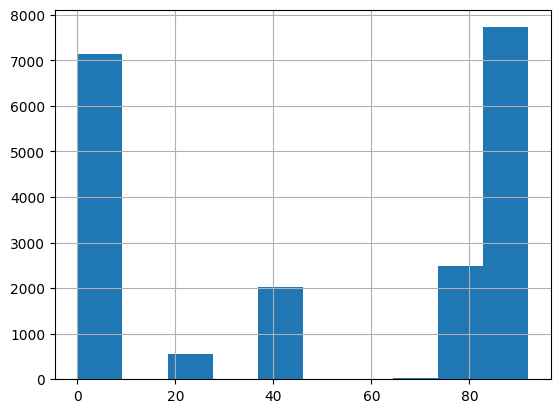

In [6]:
df['clouds_all'].hist()
# needs scaling

<Axes: >

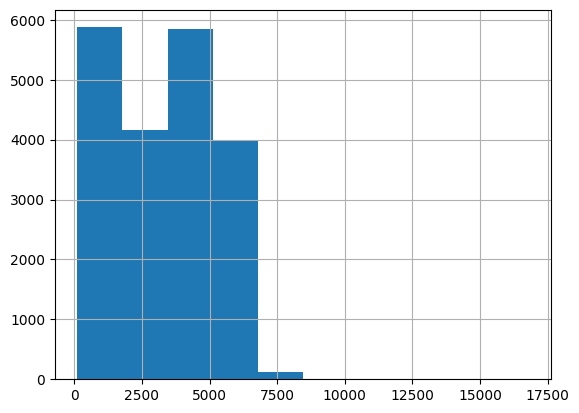

In [7]:
df['traffic_volume'].hist()
# No outlieres but needs scaling

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [8]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [9]:
# Handling missing values
df.fillna(df['traffic_volume'].mean(), inplace=True)

In [10]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [11]:
# dropping weather_description since it is the same as weather_main
df.drop('weather_description', axis=1, inplace=True)

In [82]:
# resampling data to days rather than hours
df_daily = df.resample('D').agg({
  'traffic_volume': 'mean',
  'temp': 'mean',
  'rain_1h': pd.Series.max,
  'snow_1h': pd.Series.max,
  'clouds_all': 'mean',
  'weather_main': lambda x: x.mode()[0] # taking the first weather_main since it is may take more than one value
})

KeyError: 0

<Axes: >

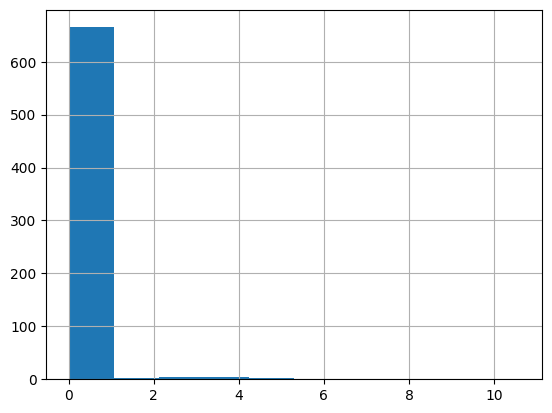

In [13]:
df_daily['rain_1h'].hist()
# most values are close to zero

<Axes: >

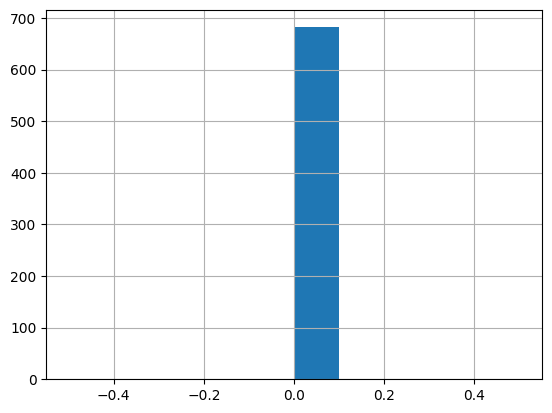

In [14]:
df_daily['snow_1h'].hist()
# most values are close to zero

In [15]:
df_daily.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main
date_time,,,,,,
2016-11-18,3397.000000,273.582500,0.0,0.0,85.000000,Snow
2016-11-19,2710.333333,271.048333,0.0,0.0,53.666667,Clouds
2016-11-20,2231.500000,269.565000,0.0,0.0,36.500000,Clouds
2016-11-21,3265.666667,271.654583,0.0,0.0,6.041667,Clear
2016-11-22,3273.807692,274.069423,0.0,0.0,81.442308,Snow


In [16]:
df_daily['weather_main'].value_counts()
# It looks great!

,count
weather_main,
Clear,267
Clouds,212
Rain,78
Mist,60
Snow,53
Drizzle,4
Thunderstorm,4
Haze,2
Fog,2


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [17]:
df_daily['prev_traffic_volume'] = df_daily['traffic_volume'].shift(1)

In [18]:
df_daily['Day_of_week'] = df_daily.index.day_of_week
df_daily['Month'] = df_daily.index.month
df_daily['Day_of_the_year'] = df_daily.index.day_of_year

In [19]:
df_daily['Difference_in_traffic_volume'] = df_daily['Day_of_week'].diff()

In [25]:
df_daily.dropna(inplace=True)

In [23]:
# Encoding
df_daily = pd.get_dummies(df_daily, drop_first=True, dtype=int)

In [24]:
df_daily.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,prev_traffic_volume,Day_of_week,Month,Day_of_the_year,Difference_in_traffic_volume,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Snow,weather_main_Thunderstorm
date_time,,,,,,,,,,,,,,,,,,
2016-11-19,2710.333333,271.048333,0.0,0.0,53.666667,3397.000000,5,11,324,1.0,1,0,0,0,0,0,0,0
2016-11-20,2231.500000,269.565000,0.0,0.0,36.500000,2710.333333,6,11,325,1.0,1,0,0,0,0,0,0,0
2016-11-21,3265.666667,271.654583,0.0,0.0,6.041667,2231.500000,0,11,326,-6.0,0,0,0,0,0,0,0,0
2016-11-22,3273.807692,274.069423,0.0,0.0,81.442308,3265.666667,1,11,327,1.0,0,0,0,0,0,0,1,0
2016-11-23,3074.862745,274.222353,0.0,0.0,90.000000,3273.807692,2,11,328,1.0,0,0,0,0,1,0,0,0


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [33]:
X = df_daily.drop('traffic_volume', axis=1)
y = df_daily['traffic_volume']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [34]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [35]:
X_train_sc

array([[-0.58300302,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [-0.7079627 ,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [-0.53193102,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       ...,
       [ 1.02869604,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 0.98047361,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 1.36134854,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411]])

In [36]:
X_test_sc

array([[ 1.42242434,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 1.41331352,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 0.86539524,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       ...,
       [ 0.30491273,  0.        ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 0.01401221,  0.25      ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411],
       [ 0.34007856,  0.25      ,  0.        , ..., -0.29296475,
        -0.32510161, -0.04291411]])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [78]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Dropout,Input
from keras.callbacks import EarlyStopping

rnn = Sequential([
    Input(shape=(X_train.shape[1], 1,)),
    SimpleRNN(units=70, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(units=50, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(units=30, return_sequences=True),
    SimpleRNN(64, return_sequences=True, recurrent_dropout=0.15),
    SimpleRNN(96, return_sequences=True, recurrent_dropout=0.15),
    Dropout(0.15),
    SimpleRNN(128),

    Dense(units=1)
])

rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)             │ (None, 17, 70)              │           5,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 17, 70)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 17, 50)              │           6,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 17, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 17, 30)              │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ (None, 17, 64)              │           6,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 17, 96)              │          15,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 17, 96)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 128)                 │          28,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,985 (249.94 KB)

 Trainable params: 63,985 (249.94 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
rnn.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mean_squared_error']
)

In [80]:
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=50,
    monitor='val_loss'
)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [81]:
history = rnn.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.2,
    shuffle=False,
    callbacks=[early_stopping]
)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - loss: 3268.9734 - mean_squared_error: 11014025.0000 - val_loss: 3311.3447 - val_mean_squared_error: 11353911.0000
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3263.1531 - mean_squared_error: 10975931.0000 - val_loss: 3307.8975 - val_mean_squared_error: 11331108.0000
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3258.9905 - mean_squared_error: 10948843.0000 - val_loss: 3305.7849 - val_mean_squared_error: 11317133.0000
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 3256.5171 - mean_squared_error: 10932732.0000 - val_loss: 3304.6060 - val_mean_squared_error: 11309340.0000
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 3255.0967 - mean_squared_error: 10923551.0000 - val_loss: 3303.8423 - val_mean_squared_error: 11304291.0000
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 3254.1987 - mean_squared_error: 10917771.0000 - val_loss: 3303.1992 - val_mean_squared_error: 11300043.00

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [50]:
rnn_pred = rnn.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: >

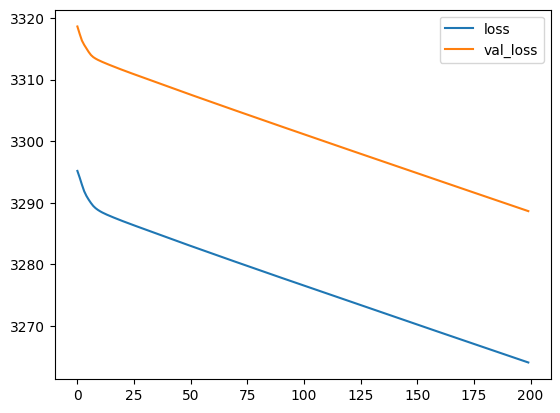

In [51]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [72]:
pd.DataFrame(rnn_pred).plot(legend=True)
y_test.plot(legend=True)

ValueError: Must pass 2-d input. shape=(137, 17, 1)

In [75]:
pd.DataFrame({
    'y_test': y_test,
    'rnn_pred': rnn_pred.flatten(),
}).plot()

ValueError: array length 2329 does not match index length 137

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_train,
                order=(0, 1, 1),
                seasonal_order=(2, 1, 1, 12))

result = sarima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     traffic_volume   No. Observations:                  544
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -4087.969
Date:                            Sun, 25 Aug 2024   AIC                           8185.937
Time:                                    17:20:00   BIC                           8207.311
Sample:                                11-19-2016   HQIC                          8194.302
                                     - 05-16-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9272      0.019    -49.197      0.000      -0.964      -0.890
ar.S.L12      -0.3550      0.041     -8.655      0.000      -0.435      -0.275
ar.S.L24      -0.4488      0.043    -10.528      0.000      -0.532      -0.365
ma.S.L12      -0.9493      0.026    -37.155      0.000      -0.999      -0.899
sigma2      2.617e+05   1.41e+04     18.601      0.000    2.34e+05    2.89e+05
===================================================================================
Ljung-Box (L1) (Q):                  16.19   Jarque-Bera (JB):                53.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.63
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [66]:
start = len(y_train)
end = len(y_train) + len(y_test) - 1

sarima_pred = result.predict(start, end, typ='levels').rename("Predictions")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

<Axes: xlabel='date_time'>

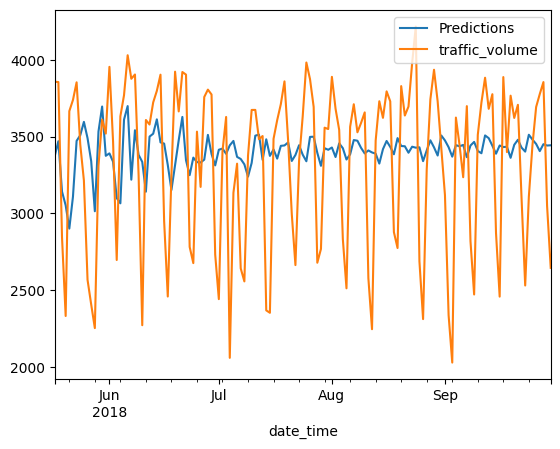

In [67]:
sarima_pred.plot(legend=True)
y_test.plot(legend=True)

In [70]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

rmse(y_test, sarima_pred)

520.5849669264484

In [69]:
mean_squared_error(y_test, sarima_pred)

271008.70778981136

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: